# Age and gender recognition

## Part 1. Data preparation


### 1.1. Data loading and preprocessing 

In [1]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
import datetime as date
from matplotlib import pyplot as plt
from dateutil.relativedelta import relativedelta

In [2]:
wiki_data = loadmat('data/wiki/wiki.mat')

In [3]:
wiki = wiki_data['wiki']

In [4]:
wiki

array([[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]]), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
        array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
        array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
        array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
        array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
        array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
      dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
        array(['Dettmar Cramer'], dtype='<U14'),
        array(['Marc Okrand'], dtype='<U11'), ...,
        array(['Michael Wiesinger'], dtype='<U17'),
        array(['Johann Grugger'], dtype='<U14'),
        array(['Greta Van Susteren'], dtype='<U18')]], dtype=object), array([[array([[111.29109473, 111.29109473, 252.66993082, 252.66993082]]),
       

In [5]:
wiki_photo_taken = wiki[0][0][1][0]
wiki_path = wiki[0][0][2][0]
wiki_gender = wiki[0][0][3][0]
wiki_face_score1 = wiki[0][0][6][0]
wiki_face_score2 = wiki[0][0][7][0]

In [6]:
for i in range(len(wiki_path)):
    wiki_path[i] = 'data/wiki/' + wiki_path[i][0]

In [7]:
wiki_dob = []

In [8]:
for file in wiki_path:
    wiki_dob.append(file.split('_')[1])

In [9]:
wiki_age = []

In [10]:
for i in range(len(wiki_dob)):
    try:
        d1 = date.datetime.strptime(wiki_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(wiki_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
    except:
        diff = None
    wiki_age.append(diff)

In [11]:
final_wiki = np.vstack((wiki_age, wiki_gender, wiki_path, wiki_face_score1, wiki_face_score2)).T

wiki_df = pd.DataFrame(final_wiki)

In [12]:
wiki_df.columns = ['age', 'gender', 'path', 'face_score1', 'face_score2']

In [13]:
wiki_df.head()

,age,gender,path,face_score1,face_score2
0,27,1,data/wiki/17/10000217_1981-05-05_2009.jpg,4.30096,NaN
1,38,1,data/wiki/48/10000548_1925-04-04_1964.jpg,2.64564,1.94925
2,59,1,data/wiki/12/100012_1948-07-03_2008.jpg,4.32933,NaN
3,30,1,data/wiki/65/10001965_1930-05-23_1961.jpg,-inf,NaN
4,40,0,data/wiki/16/10002116_1971-05-31_2012.jpg,3.40844,NaN


In [14]:
wiki_df.isnull().sum()

age               16
gender          2643
path               0
face_score1        0
face_score2    58232
dtype: int64

Drop missing values and photos with missing face or 2 faces:

In [15]:
wiki_df['face_score1'].replace([np.inf, -np.inf], np.nan, inplace=True)
wiki_df = wiki_df.dropna(subset=['age', 'gender', 'face_score1'])
wiki_df = wiki_df[wiki_df['face_score2'].isnull()]

In [16]:
wiki_df.isnull().sum()

age                0
gender             0
path               0
face_score1        0
face_score2    39449
dtype: int64

In [17]:
wiki_df = wiki_df.drop(['face_score1', 'face_score2'], axis=1)

Now we have our final dataframe

In [18]:
wiki_df.head()

,age,gender,path
0,27,1,data/wiki/17/10000217_1981-05-05_2009.jpg
2,59,1,data/wiki/12/100012_1948-07-03_2008.jpg
4,40,0,data/wiki/16/10002116_1971-05-31_2012.jpg
5,51,0,data/wiki/02/10002702_1960-11-09_2012.jpg
6,33,1,data/wiki/41/10003541_1937-09-27_1971.jpg


### 1.2. Image preprocessing


In this part we would detect the face and scale the image.

In [19]:
import cv2

In [20]:
face_cascade = cv2.CascadeClassifier('data/face_detector.xml')

In [ ]:
cropped_path = []
i = 0
for file in wiki_df['path']:
    try:
        img = cv2.imread(file)
        faces = face_cascade.detectMultiScale(img, 1.1, 4, minSize=(64, 64))
        if len(faces) == 1:
            #x, y, w, h = faces[0][0], faces[0][1], faces[0][2], faces[0][3]
            #crop_img = img[y:y+h, x:x+w]
            new_path = 'data/wiki_crop/' + file[13:]
            cropped_path.append(new_path)
            #crop_img = cv2.resize(crop_img, (128, 128), interpolation = cv2.INTER_AREA) 
            #cv2.imwrite(new_path, crop_img)
        else:
            cropped_path.append(None)
    except:
        cropped_path.append(None)

Now compare the original photo with the cropped one

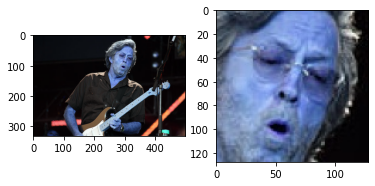

In [24]:
pre = cv2.imread('data/wiki/49/10049_1945-03-30_2008.jpg')
post = cv2.imread('data/wiki_crop/10049_1945-03-30_2008.jpg')
f, ax = plt.subplots(1,2)
ax[0].imshow(pre)
ax[1].imshow(post)
plt.show()

In [29]:
wiki_df.head()

,age,gender,path
0,27,1,data/wiki_crop/10000217_1981-05-05_2009.jpg
2,59,1,data/wiki_crop/100012_1948-07-03_2008.jpg
5,51,0,data/wiki_crop/10002702_1960-11-09_2012.jpg
6,33,1,data/wiki_crop/10003541_1937-09-27_1971.jpg
10,41,1,data/wiki_crop/10004299_1908-08-19_1950.jpg


In [22]:
#to load
import os
cropped_path = []
for file in wiki_df['path']:
    new_path = 'data/wiki_crop/' + file[13:]
    if os.path.exists(new_path):
        cropped_path.append(new_path)
    else:
        cropped_path.append(None)

In [23]:
wiki_df['path'] = cropped_path

In [25]:
wiki_df = wiki_df.reset_index()

In [155]:
#Contradictory samplescheck
from skimage.measure import compare_ssim as ssim 

for i in range(len(wiki_df['path'])-1):
    for j in range(i+1, len(wiki_df['path'])):
        img1 = cv2.imread(wiki_df['path'][i])
        img2 = cv2.imread(wiki_df['path'][j])
        s = ssim(img1,img2, multichannel = True)  
        if (s > 0.8):
            if (abs(wiki_df['age'][i]-wiki_df['age'][j]) > 10) or wiki_df['gender'][i] != wiki_df['gender'][j]:
                wiki_df['path'][i] = None
                wiki_df['path'][j] = None
            

<ipython-input-155-d7b4d133b716>:7: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  s = ssim(img1,img2, multichannel = True)


In [24]:
wiki_df = wiki_df.dropna(subset=['path'])

In [26]:
wiki_df

,index,age,gender,path
0,0,27,1,data/wiki_crop/10000217_1981-05-05_2009.jpg
1,2,59,1,data/wiki_crop/100012_1948-07-03_2008.jpg
2,5,51,0,data/wiki_crop/10002702_1960-11-09_2012.jpg
3,6,33,1,data/wiki_crop/10003541_1937-09-27_1971.jpg
4,10,41,1,data/wiki_crop/10004299_1908-08-19_1950.jpg
...,...,...,...,...
26419,62321,30,1,data/wiki_crop/9996938_1937-02-15_1968.jpg
26420,62322,24,1,data/wiki_crop/9996946_1943-11-01_1968.jpg
26421,62323,25,1,data/wiki_crop/9996949_1937-04-17_1963.jpg
26422,62325,40,1,data/wiki_crop/9998109_1972-12-27_2013.jpg


## Part 2. Training

In [118]:
images = []
for file in wiki_df['path'][:10000]:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images.append(img)
images = np.array(images)
images = images.astype('float32')

labels = np.column_stack((wiki_df['gender'][:15000].astype('int32'), wiki_df['age'][:15000].astype('int32'))).astype('int32')

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(images[:10000], labels[:10000], test_size=0.25)
Y_train = [Y_train[:,1],Y_train[:,0]]
Y_test = [Y_test[:,1],Y_test[:,0]]

In [120]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def Convolution(input_tensor,filters):
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)
    return x

def model(input_shape):
    inputs = Input((input_shape))
    conv_1= Convolution(inputs,32)
    maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
    conv_3 = Convolution(maxp_2,128)
    maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
    flatten= Flatten() (maxp_4)
    dense_1= Dense(64,activation='relu')(flatten)
    dense_2= Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1= Dense(1,activation="sigmoid",name='gender')(drop_1)
    output_2= Dense(1,activation="relu",name='age')(drop_2)
    model = Model(inputs=[inputs], outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",metrics=["accuracy", "mae"])
    return model

In [121]:
Model=model((128,128,1))

In [122]:
Model.summary()

Model: "functional_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 128, 128, 32) 320         input_11[0][0]                   
__________________________________________________________________________________________________
dropout_60 (Dropout)            (None, 128, 128, 32) 0           conv2d_40[0][0]                  
__________________________________________________________________________________________________
activation_40 (Activation)      (None, 128, 128, 32) 0           dropout_60[0][0]                 
______________________________________________________________________________________

In [123]:
#Train
from keras.callbacks import ModelCheckpoint, EarlyStopping
fle_s = 'Gender_age_detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop = EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
callback_list = [checkpointer,Early_stop]
Historys = Model.fit(X_train,Y_train,batch_size=64,validation_data=(X_test,Y_test),epochs=75,callbacks=[callback_list])

Epoch 1/75
118/118 [==============================] - ETA: 0s - loss: 24.0556 - gender_loss: 3.4228 - age_loss: 20.3547 - gender_accuracy: 0.7192 - gender_mae: 0.3911 - age_accuracy: 0.0000e+00 - age_mae: 20.3547
Epoch 00001: val_loss improved from inf to 17.01345, saving model to 20thousand.h5
118/118 [==============================] - 201s 2s/step - loss: 24.0556 - gender_loss: 3.4228 - age_loss: 20.3547 - gender_accuracy: 0.7192 - gender_mae: 0.3911 - age_accuracy: 0.0000e+00 - age_mae: 20.3547 - val_loss: 17.0135 - val_gender_loss: 0.5441 - val_age_loss: 16.2121 - val_gender_accuracy: 0.7556 - val_gender_mae: 0.3772 - val_age_accuracy: 0.0000e+00 - val_age_mae: 16.2121
Epoch 2/75
118/118 [==============================] - ETA: 0s - loss: 15.9226 - gender_loss: 0.5608 - age_loss: 15.1143 - gender_accuracy: 0.7460 - gender_mae: 0.3764 - age_accuracy: 0.0000e+00 - age_mae: 15.1143
Epoch 00002: val_loss did not improve from 17.01345
118/118 [==============================] - 200s 2s/st

Epoch 14/75
118/118 [==============================] - ETA: 0s - loss: 11.4014 - gender_loss: 0.3294 - age_loss: 10.8007 - gender_accuracy: 0.8599 - gender_mae: 0.2092 - age_accuracy: 0.0000e+00 - age_mae: 10.8007
Epoch 00014: val_loss did not improve from 13.25066
118/118 [==============================] - 197s 2s/step - loss: 11.4014 - gender_loss: 0.3294 - age_loss: 10.8007 - gender_accuracy: 0.8599 - gender_mae: 0.2092 - age_accuracy: 0.0000e+00 - age_mae: 10.8007 - val_loss: 17.8572 - val_gender_loss: 0.3385 - val_age_loss: 17.2429 - val_gender_accuracy: 0.8692 - val_gender_mae: 0.2303 - val_age_accuracy: 0.0000e+00 - val_age_mae: 17.2429
Epoch 15/75
118/118 [==============================] - ETA: 0s - loss: 11.3865 - gender_loss: 0.3206 - age_loss: 10.7829 - gender_accuracy: 0.8691 - gender_mae: 0.2011 - age_accuracy: 0.0000e+00 - age_mae: 10.7829
Epoch 00015: val_loss did not improve from 13.25066
118/118 [==============================] - 196s 2s/step - loss: 11.3865 - gender_l

Epoch 27/75
118/118 [==============================] - ETA: 0s - loss: 9.2051 - gender_loss: 0.2143 - age_loss: 8.5957 - gender_accuracy: 0.9085 - gender_mae: 0.1370 - age_accuracy: 0.0000e+00 - age_mae: 8.5957
Epoch 00027: val_loss did not improve from 11.72794
118/118 [==============================] - 198s 2s/step - loss: 9.2051 - gender_loss: 0.2143 - age_loss: 8.5957 - gender_accuracy: 0.9085 - gender_mae: 0.1370 - age_accuracy: 0.0000e+00 - age_mae: 8.5957 - val_loss: 12.2124 - val_gender_loss: 0.3106 - val_age_loss: 11.5032 - val_gender_accuracy: 0.8820 - val_gender_mae: 0.1871 - val_age_accuracy: 0.0000e+00 - val_age_mae: 11.5032
Epoch 28/75
118/118 [==============================] - ETA: 0s - loss: 9.2462 - gender_loss: 0.2123 - age_loss: 8.6320 - gender_accuracy: 0.9129 - gender_mae: 0.1332 - age_accuracy: 0.0000e+00 - age_mae: 8.6320
Epoch 00028: val_loss did not improve from 11.72794
118/118 [==============================] - 196s 2s/step - loss: 9.2462 - gender_loss: 0.212

Epoch 40/75
118/118 [==============================] - ETA: 0s - loss: 8.4439 - gender_loss: 0.1437 - age_loss: 7.8161 - gender_accuracy: 0.9363 - gender_mae: 0.0916 - age_accuracy: 0.0000e+00 - age_mae: 7.8161
Epoch 00040: val_loss did not improve from 10.85251
118/118 [==============================] - 195s 2s/step - loss: 8.4439 - gender_loss: 0.1437 - age_loss: 7.8161 - gender_accuracy: 0.9363 - gender_mae: 0.0916 - age_accuracy: 0.0000e+00 - age_mae: 7.8161 - val_loss: 11.2806 - val_gender_loss: 0.3256 - val_age_loss: 10.4681 - val_gender_accuracy: 0.8904 - val_gender_mae: 0.1432 - val_age_accuracy: 0.0000e+00 - val_age_mae: 10.4681
Epoch 41/75
118/118 [==============================] - ETA: 0s - loss: 8.3563 - gender_loss: 0.1379 - age_loss: 7.7273 - gender_accuracy: 0.9392 - gender_mae: 0.0858 - age_accuracy: 0.0000e+00 - age_mae: 7.7273
Epoch 00041: val_loss did not improve from 10.85251
118/118 [==============================] - 196s 2s/step - loss: 8.3563 - gender_loss: 0.137

Epoch 53/75
118/118 [==============================] - ETA: 0s - loss: 7.8914 - gender_loss: 0.1122 - age_loss: 7.2408 - gender_accuracy: 0.9453 - gender_mae: 0.0712 - age_accuracy: 0.0000e+00 - age_mae: 7.2408
Epoch 00053: val_loss did not improve from 10.85251
118/118 [==============================] - 196s 2s/step - loss: 7.8914 - gender_loss: 0.1122 - age_loss: 7.2408 - gender_accuracy: 0.9453 - gender_mae: 0.0712 - age_accuracy: 0.0000e+00 - age_mae: 7.2408 - val_loss: 11.6517 - val_gender_loss: 0.3509 - val_age_loss: 10.7563 - val_gender_accuracy: 0.8864 - val_gender_mae: 0.1439 - val_age_accuracy: 0.0000e+00 - val_age_mae: 10.7563
Epoch 54/75
118/118 [==============================] - ETA: 0s - loss: 7.9938 - gender_loss: 0.1187 - age_loss: 7.3297 - gender_accuracy: 0.9445 - gender_mae: 0.0735 - age_accuracy: 0.0000e+00 - age_mae: 7.3297
Epoch 00054: val_loss did not improve from 10.85251
118/118 [==============================] - 195s 2s/step - loss: 7.9938 - gender_loss: 0.118

Epoch 66/75
118/118 [==============================] - ETA: 0s - loss: 7.5675 - gender_loss: 0.0885 - age_loss: 6.8992 - gender_accuracy: 0.9553 - gender_mae: 0.0562 - age_accuracy: 0.0000e+00 - age_mae: 6.8992
Epoch 00066: val_loss did not improve from 10.85251
118/118 [==============================] - 211s 2s/step - loss: 7.5675 - gender_loss: 0.0885 - age_loss: 6.8992 - gender_accuracy: 0.9553 - gender_mae: 0.0562 - age_accuracy: 0.0000e+00 - age_mae: 6.8992 - val_loss: 11.4612 - val_gender_loss: 0.4492 - val_age_loss: 10.4326 - val_gender_accuracy: 0.8960 - val_gender_mae: 0.1151 - val_age_accuracy: 0.0000e+00 - val_age_mae: 10.4326
Epoch 67/75
118/118 [==============================] - ETA: 0s - loss: 7.6817 - gender_loss: 0.0897 - age_loss: 7.0104 - gender_accuracy: 0.9536 - gender_mae: 0.0554 - age_accuracy: 0.0000e+00 - age_mae: 7.0104
Epoch 00067: val_loss did not improve from 10.85251
118/118 [==============================] - 207s 2s/step - loss: 7.6817 - gender_loss: 0.089

In [83]:
#Load pretrained above model
Model = load_model('Gender_age_detection.h5')

In [151]:
def test_image(ind,images,Model):
    plt.imshow(images[ind], cmap="gray", vmin=0, vmax=255)
    plt.show()
    image_test=images[ind]
    pred_1=Model.predict(np.array([image_test]))
    gender_f=['Female','Male']
    age=int(np.round(pred_1[1][0]))
    gender=int(np.round(pred_1[0][0]))
    print("Predicted Age: "+ str(age))
    print("Predicted Gender: "+ gender_f[gender])
    print("Actual age: " + str(wiki_df['age'][ind]))

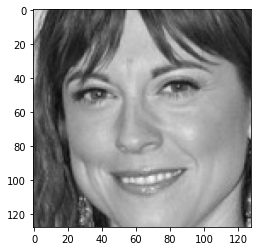

Predicted Age: 37
Predicted Gender: Female
Actual age: 42


In [154]:
test_image(9969,images,Model)

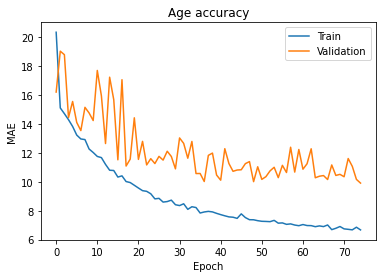

In [157]:
plt.plot(Historys.history['age_mae'])
plt.plot(Historys.history['val_age_mae'])
plt.title('Age accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

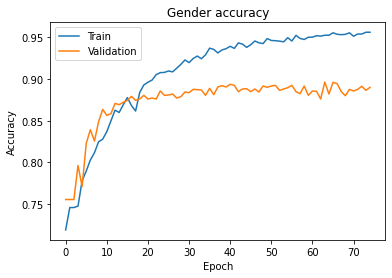

In [158]:
plt.plot(Historys.history['gender_accuracy'])
plt.plot(Historys.history['val_gender_accuracy'])
plt.title('Gender accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')